/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/1386246887.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tran_Date'] = pd.to_datetime(filtered_df['Tran_Date'])
/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/1386246887.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tran_City'] = filtered_df['Tran_City'].apply(capitalize_words)


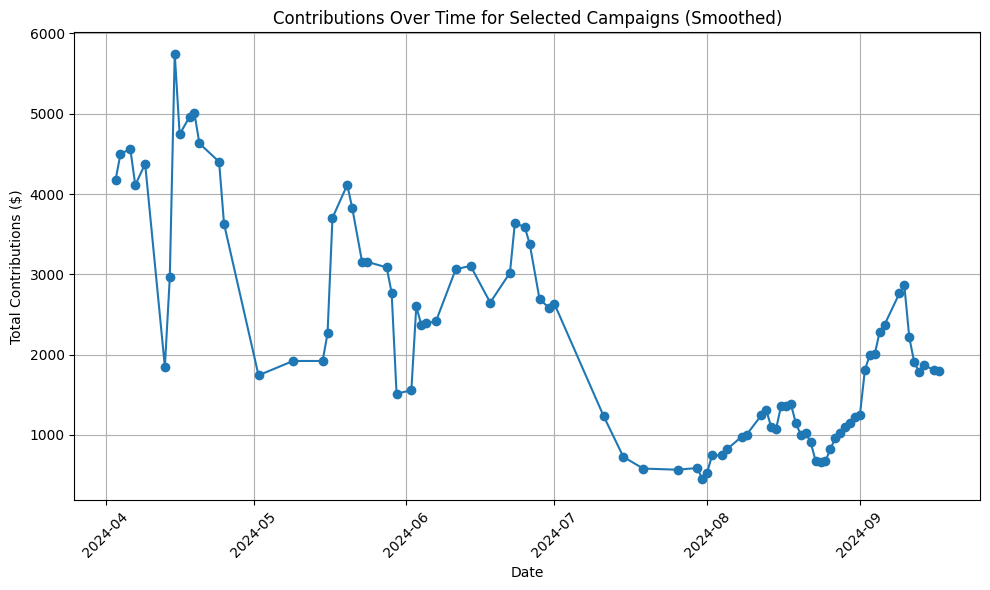

In [439]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/gracehoopingarner/Documents/Chico Green City Analysis/Financial Reporting 9-29-24/efile_CHCO_2024 2(A-Contributions).csv'
df = pd.read_csv(file_path)

# Filter the data for specific campaigns
filtered_df = df[df['Filer_NamL'].isin(["A Better Chico", 
                                          "O'Brien For City Council 2024", 
                                          "Tandon for Chico City Council 2024", 
                                          "Bennett for City Council 2024",
                                          "Melissa Lopez-Mora for Chico City Council 2024"])]
                                          #"Yes on O & P - Friends of Chico's Affordable Homes & Neighborhoods, sponsored by Believe in Chico, LLC"])]

# Convert 'Tran_Date' to datetime format
filtered_df['Tran_Date'] = pd.to_datetime(filtered_df['Tran_Date'])

# Function to capitalize first letter of each word if there's no comma
def capitalize_words(city):
    if ',' not in city:
        return ' '.join([word.capitalize() for word in city.split()])
    return city

# Apply the function to 'Tran_City' column
filtered_df['Tran_City'] = filtered_df['Tran_City'].apply(capitalize_words)

# Group by date and sum contributions
grouped_df_consv = filtered_df.groupby('Tran_Date')['Tran_Amt1'].sum().reset_index()

# Apply a rolling mean to smooth the data (e.g., 7-day window)
grouped_df_consv['Smoothed_Contributions'] = grouped_df_consv['Tran_Amt1'].rolling(window=7, center=True).mean()

# Plot the smoothed contributions over time
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_consv['Tran_Date'], grouped_df_consv['Smoothed_Contributions'], marker='o')
plt.title('Contributions Over Time for Selected Campaigns (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Total Contributions ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


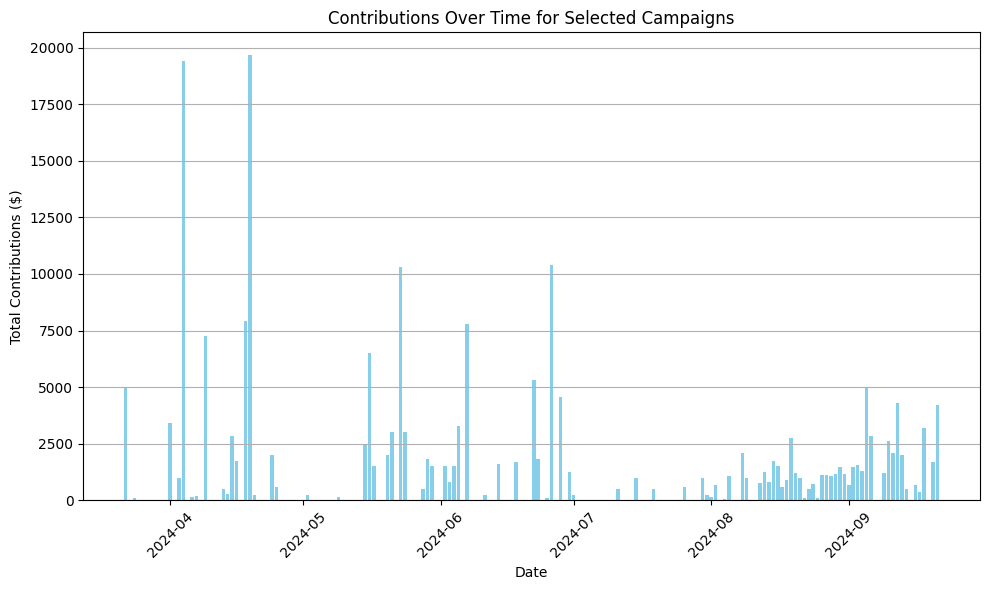

In [440]:
# Plot the contributions over time as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_consv['Tran_Date'], grouped_df_consv['Tran_Amt1'], color='skyblue')
plt.title('Contributions Over Time for Selected Campaigns')
plt.xlabel('Date')
plt.ylabel('Total Contributions ($)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

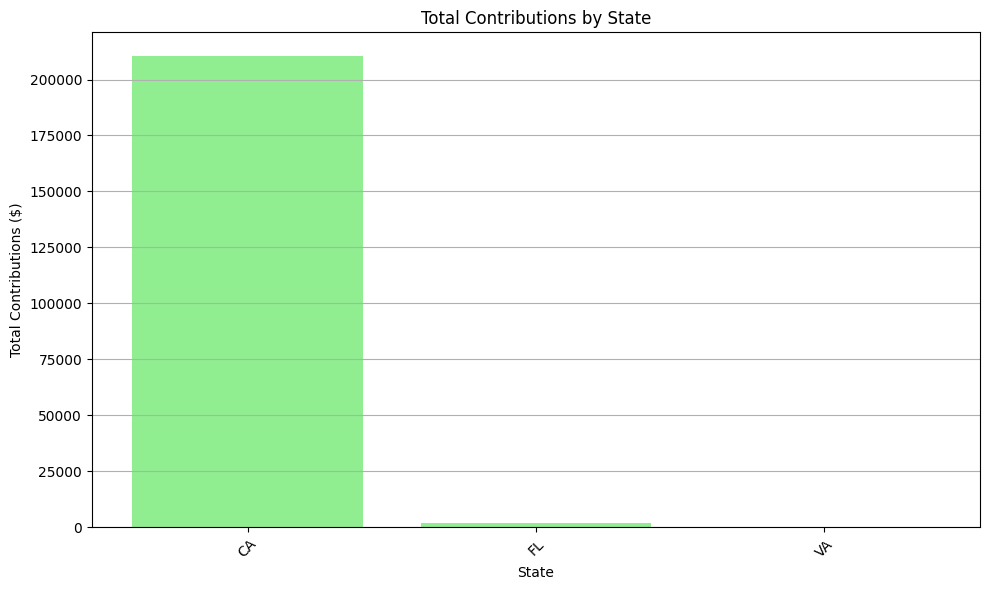

In [441]:
# Group by 'Tran_State' and sum contributions
state_grouped_df_consv = filtered_df.groupby('Tran_State')['Tran_Amt1'].sum().reset_index()

# Remove states with 0 or NaN contributions
state_grouped_df = state_grouped_df_consv[state_grouped_df_consv['Tran_Amt1'] > 0]

plt.figure(figsize=(10, 6))
plt.bar(state_grouped_df['Tran_State'], state_grouped_df['Tran_Amt1'], color='lightgreen')
plt.title('Total Contributions by State')
plt.xlabel('State')
plt.ylabel('Total Contributions ($)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

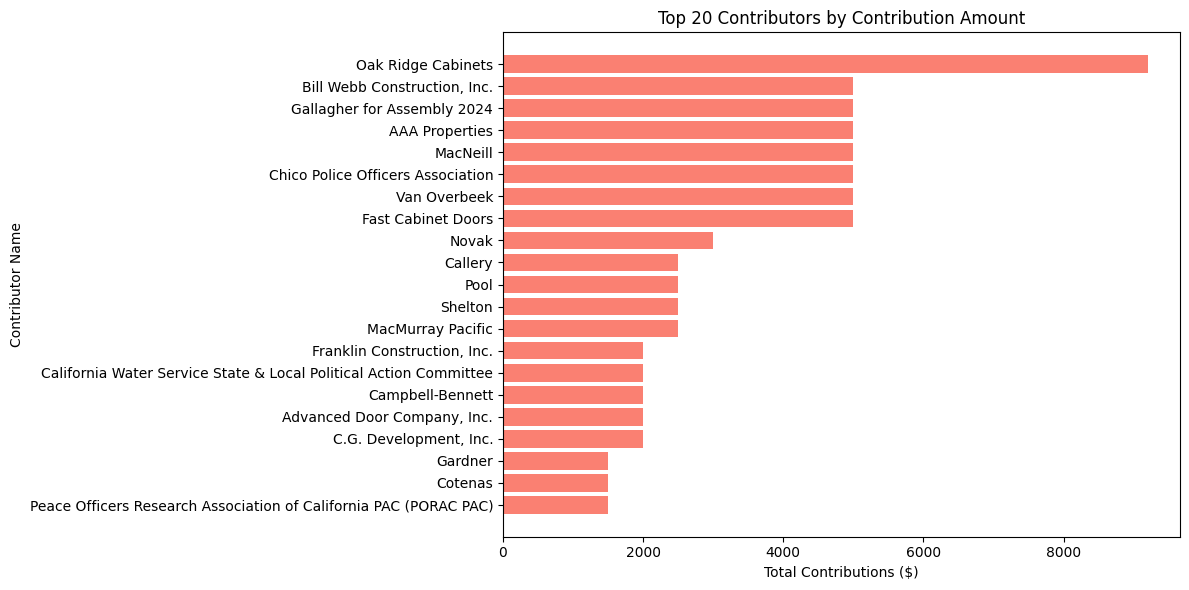

In [442]:
# Sort by contribution amount and select top 20 contributors
top_contributors = filtered_df.sort_values(by='Tran_Amt1', ascending=False).head(25)

# Combine first and last names to show contributor names in plot
top_contributors['Contributor_Name'] = top_contributors['Tran_NamL']

# Plot the top 20 contributors by contribution amount
plt.figure(figsize=(12, 6))
plt.barh(top_contributors['Contributor_Name'], top_contributors['Tran_Amt1'], color='salmon')
plt.title('Top 20 Contributors by Contribution Amount')
plt.xlabel('Total Contributions ($)')
plt.ylabel('Contributor Name')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest contributor on top
plt.tight_layout()
plt.show()

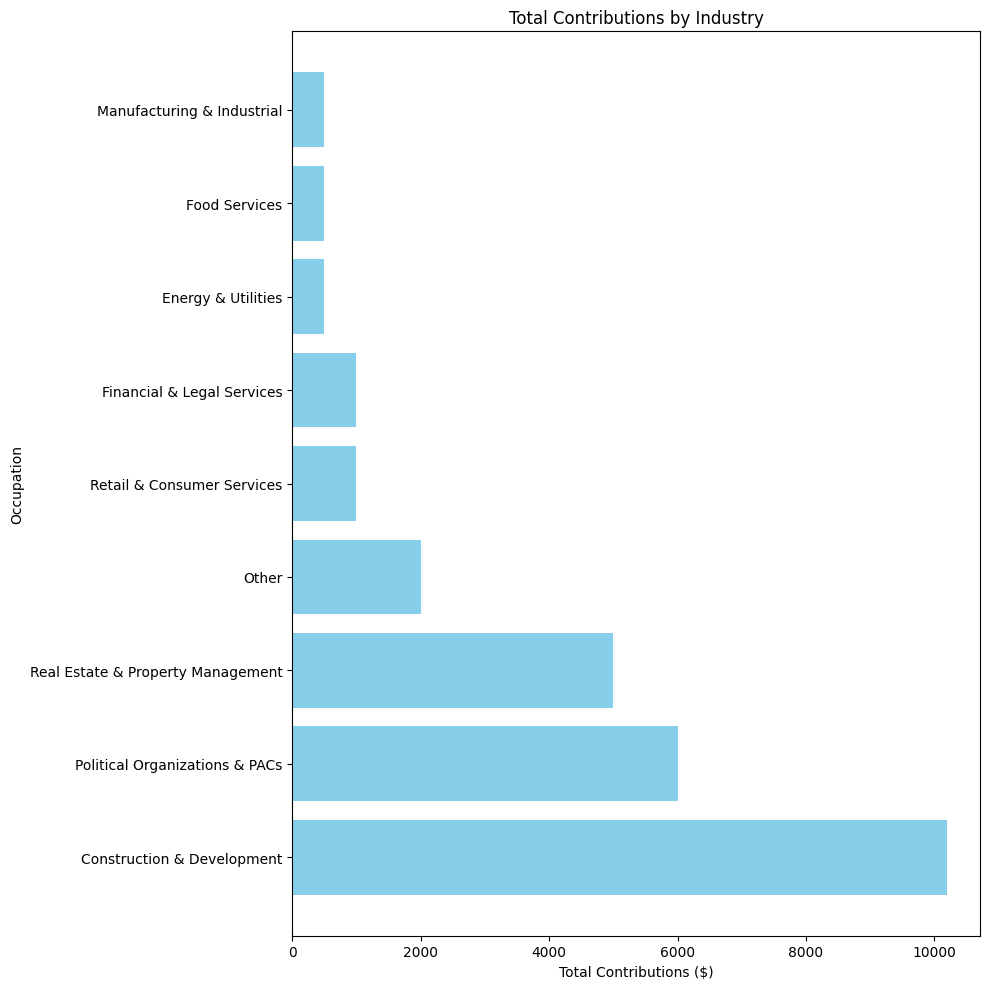

In [443]:
# Filter rows where 'Tran_NamF' (first name) is missing or empty
filtered_df_no_first_name = filtered_df[filtered_df['Tran_NamF'].isna() | (filtered_df['Tran_NamF'] == '')]
# Remove columns that contain only NaN values
filtered_df_no_first_name = filtered_df_no_first_name.dropna(axis=1, how='all')
filtered_df_no_first_name = filtered_df_no_first_name.groupby('Tran_NamL')['Tran_Amt1'].sum().reset_index()
filtered_df_no_first_name = filtered_df_no_first_name.sort_values(by='Tran_Amt1', ascending=False)


unique_companies = filtered_df_no_first_name['Tran_NamL'].unique().tolist()


# Categorizing the entries in a DataFrame column
def categorize_entry(entry):
    entry_lower = entry.lower()
    
    if any(keyword in entry_lower for keyword in ['construction', 'development', 'contractor', 'cabinet', 'flooring', 'door']):
        return 'Construction & Development'
    elif any(keyword in entry_lower for keyword in ['properties', 'real estate', 'communities', 'property management', 'rental']):
        return 'Real Estate & Property Management'
    elif any(keyword in entry_lower for keyword in ['pac', 'assembly', 'supervisor', 'political', 'association', 'police officers', 'republican']):
        return 'Political Organizations & PACs'
    elif any(keyword in entry_lower for keyword in ['steakhouse', 'saloon', 'food', 'sausage', 'gas']):
        return 'Food Services'
    elif any(keyword in entry_lower for keyword in ['jewelry', 'auto service', 'mattress', 'glass', 'retail', 'supply', 'calibration']):
        return 'Retail & Consumer Services'
    elif any(keyword in entry_lower for keyword in ['manufacturing', 'mini storage', 'industrial', 'supply']):
        return 'Manufacturing & Industrial'
    elif any(keyword in entry_lower for keyword in ['financial', 'wealth', 'law offices', 'legal']):
        return 'Financial & Legal Services'
    elif any(keyword in entry_lower for keyword in ['water', 'petroleum', 'utilities', 'energy']):
        return 'Energy & Utilities'
    else:
        return 'Other'

# Apply categorization to a DataFrame column
filtered_df_no_first_name['Category'] = filtered_df_no_first_name['Tran_NamL'].apply(categorize_entry)

# Plot total contributions by occupation
plt.figure(figsize=(10, 10))
plt.barh(filtered_df_no_first_name['Category'], filtered_df_no_first_name['Tran_Amt1'], color='skyblue')
plt.title('Total Contributions by Industry')
plt.xlabel('Total Contributions ($)')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


In [444]:
# Get a list of all unique entries in the 'Tran_Occ' column
unique_companies = filtered_df_no_first_name['Category'].unique().tolist()

# Display the list
print(unique_companies)

['Construction & Development', 'Political Organizations & PACs', 'Real Estate & Property Management', 'Other', 'Retail & Consumer Services', 'Financial & Legal Services', 'Energy & Utilities', 'Food Services', 'Manufacturing & Industrial']


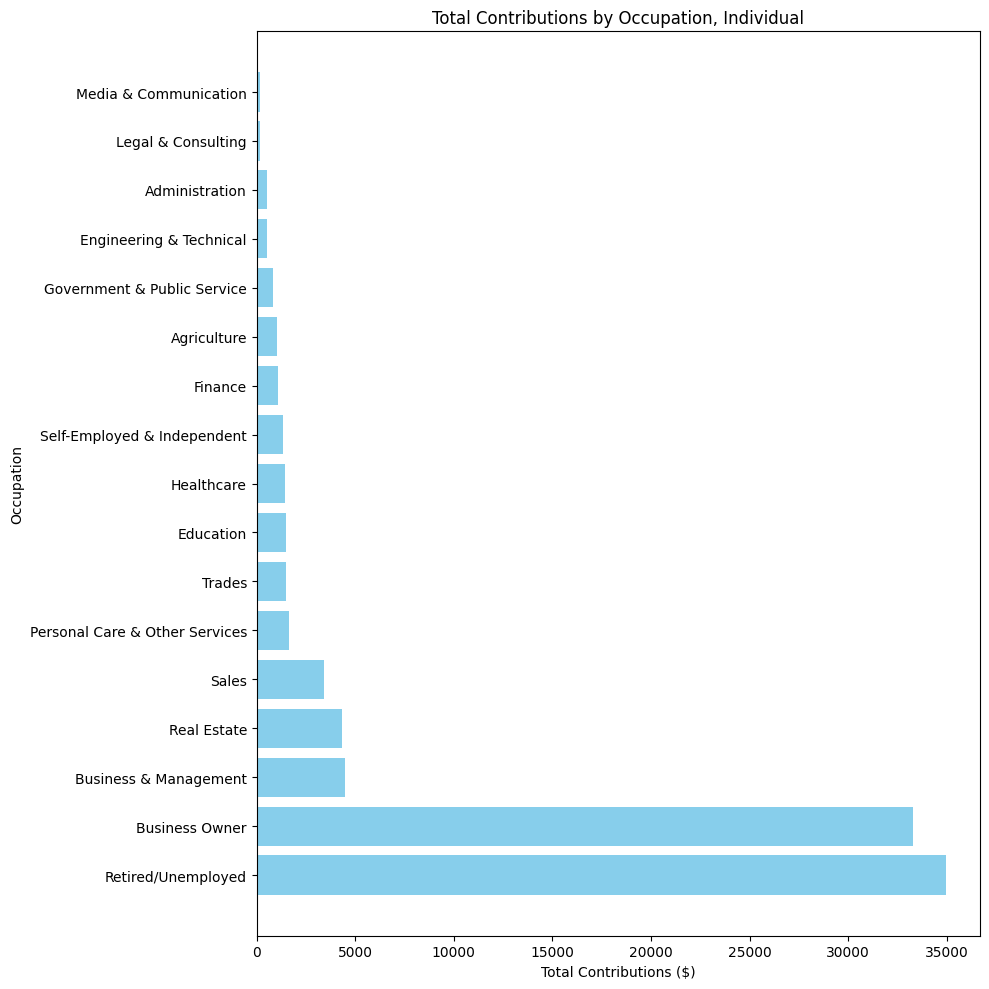

In [445]:
# Group by occupation and sum contributions
occupation_grouped_df = filtered_df.groupby('Tran_Occ')['Tran_Amt1'].sum().reset_index()

# Remove NaN or empty occupations
occupation_grouped_df = occupation_grouped_df[occupation_grouped_df['Tran_Occ'].notna() & (occupation_grouped_df['Tran_Occ'] != '')]

# Sort by total contributions
occupation_grouped_df = occupation_grouped_df.sort_values(by='Tran_Amt1', ascending=False)
occupation_grouped_df['Tran_Occ'] = occupation_grouped_df['Tran_Occ'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]))
# Extend occupation grouping to include new categories
occupation_grouped_df['Tran_Occ'] = occupation_grouped_df['Tran_Occ'].apply(
    lambda x: 'Real Estate' if any(keyword in x.lower() for keyword in ['real estate', 'realtor', 'property']) 
              else 'Business Owner' if any(keyword in x.lower() for keyword in ['owner', 'ceo', 'chief executive officer'])
              else 'Sales' if any(keyword in x.lower() for keyword in ['sales', 'dealer','agent'])
              else 'Trades' if any(keyword in x.lower() for keyword in ['builder', 'construction', 'contractor', 'cabinet', 'welder']) 
              else 'Agriculture' if any(keyword in x.lower() for keyword in ['farm', 'farmer', 'agriculture'])
              else 'Healthcare' if any(keyword in x.lower() for keyword in ['physician', 'dentist', 'nurse', 'hospital executive', 'patient care navigator'])
              else 'Education' if any(keyword in x.lower() for keyword in ['lecturer', 'instructor', 'professor', 'educator', 'principal', 'teacher', 'student','superintendent'])
              else 'Government & Public Service' if any(keyword in x.lower() for keyword in ['city councilor', 'mayor', 'city planner', 'code enforcement supervisor', 'district rep', 'urban planner'])
              else 'Business & Management' if any(keyword in x.lower() for keyword in ['manager', 'office manager', 'project manager', 'program manager', 'managing partner', 'vice president', 'president', 'chief operating officer', 'executive director', 'director', 'chairman', 'supervisor'])
              else 'Finance' if any(keyword in x.lower() for keyword in ['banker', 'investments', 'asset management', 'asset manager', 'cpa'])
              else 'Engineering & Technical' if any(keyword in x.lower() for keyword in ['engineer', 'civil engineer', 'heavy equipment mechanic', 'biologist', 'cem/ ecm sr'])
              else 'Administration' if any(keyword in x.lower() for keyword in ['human resources', 'human resource manager', 'chief of staff', 'administration'])
              else 'Legal & Consulting' if 'attorney' in x.lower() or 'consultant' in x.lower()
              # Media & Communication
              else 'Media & Communication' if 'broadcaster' in x.lower()
              # Personal Care & Other Services
              else 'Personal Care & Other Services' if any(keyword in x.lower() for keyword in ['funeral director', 'homemaker','personal chef'])
              # Self-Employed & Independent
              else 'Self-Employed & Independent' if any(keyword in x.lower() for keyword in ['self employed'])
              else 'Retired/Unemployed' if any(keyword in x.lower() for keyword in ['retired', 'unemployed'])
              # If none of the above, keep the original
              else x
)



# Plot total contributions by occupation
plt.figure(figsize=(10, 10))
plt.barh(occupation_grouped_df['Tran_Occ'], occupation_grouped_df['Tran_Amt1'], color='skyblue')
plt.title('Total Contributions by Occupation, Individual')
plt.xlabel('Total Contributions ($)')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

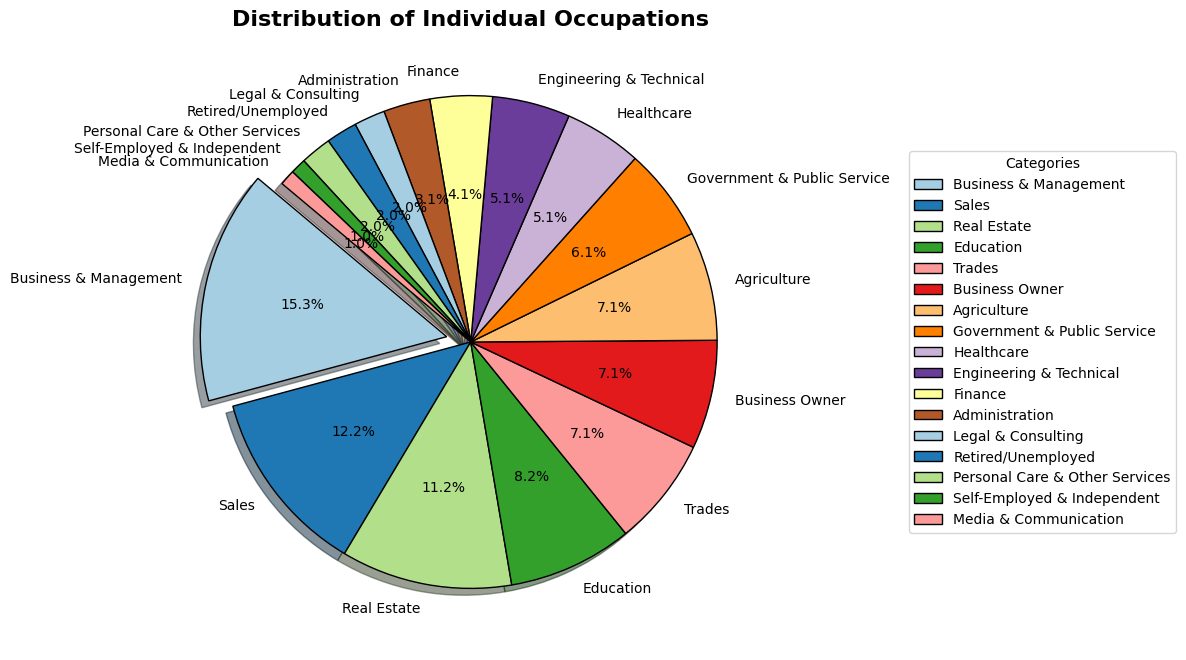

In [463]:
# Group by 'Category' and count the occurrences
category_counts = occupation_grouped_df['Tran_Occ'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    shadow=True, 
    explode=[0.1 if i == category_counts.max() else 0 for i in category_counts],
    wedgeprops={'edgecolor': 'black'},
    colors=plt.cm.Paired.colors  # Use a colormap for colors
)

# Adding a title
plt.title('Distribution of Individual Occupations', fontsize=16, fontweight='bold')

# Adding a legend
plt.legend(category_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1.2, 0.5))

# Display the pie chart
plt.show()

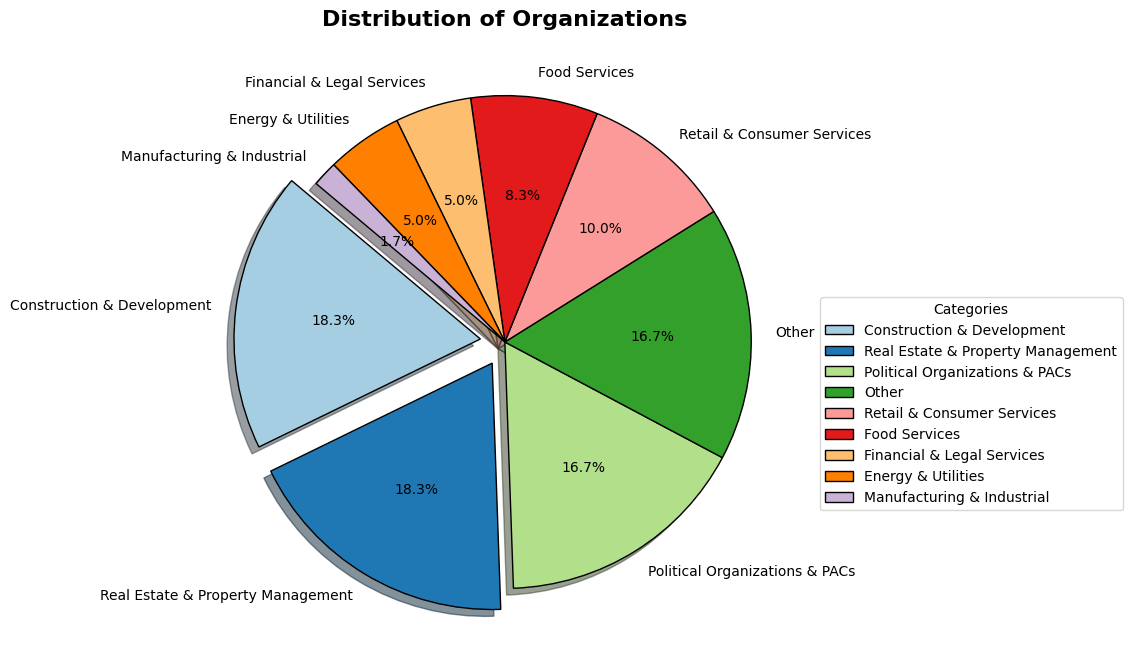

In [459]:
# Group by 'Category' and count the occurrences
category_counts = filtered_df_no_first_name['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    shadow=True, 
    explode=[0.1 if i == category_counts.max() else 0 for i in category_counts],
    wedgeprops={'edgecolor': 'black'},
    colors=plt.cm.Paired.colors  # Use a colormap for colors
)

# Adding a title
plt.title('Distribution of Organizations', fontsize=16, fontweight='bold')

# Adding a legend
plt.legend(category_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0.4))

# Display the pie chart
plt.show()

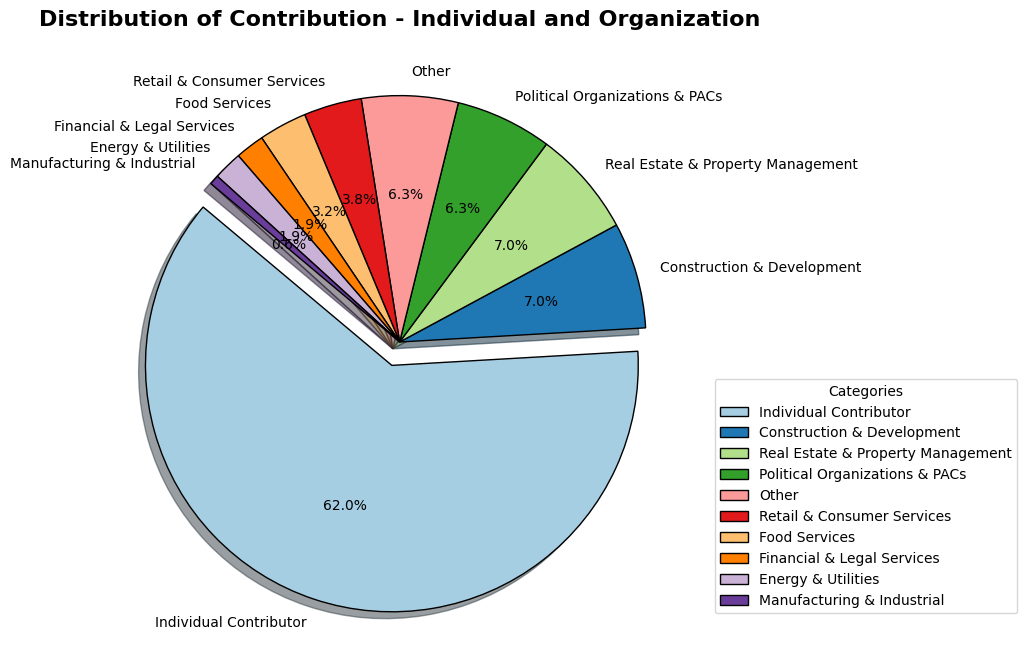

In [458]:
import pandas as pd

occupation_grouped_df_temp = occupation_grouped_df.copy()
occupation_grouped_df_temp['Category'] = occupation_grouped_df_temp['Tran_Occ']

# Combine the two DataFrames without duplicating columns
combined_df_no_duplicates = pd.concat([filtered_df_no_first_name, occupation_grouped_df_temp], axis=0, ignore_index=True).loc[:, ~pd.concat([filtered_df_no_first_name, occupation_grouped_df_temp], axis=0).columns.duplicated()]

# Update the 'Category' column based on the conditions specified
combined_df_no_duplicates['Category'] = combined_df_no_duplicates.apply(
    lambda row: 'Individual Contributor' if pd.notna(row['Tran_Occ']) 
    else row['Category'], 
    axis=1
)

# Group by 'Category' and count the occurrences
category_counts = combined_df_no_duplicates['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    shadow=True, 
    explode=[0.1 if i == category_counts.max() else 0 for i in category_counts],
    wedgeprops={'edgecolor': 'black'},
    colors=plt.cm.Paired.colors  # Use a colormap for colors
)

# Adding a title
plt.title('Distribution of Contribution - Individual and Organization', fontsize=16, fontweight='bold')

# Adding a legend
plt.legend(category_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0.25))

# Display the pie chart
plt.show()

/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/4089819813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tran_Amt1'] = pd.to_numeric(filtered_df['Tran_Amt1'], errors='coerce').fillna(0)
/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/4089819813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tran_Occ'] = filtered_df['Tran_Occ'].apply(
/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/4089819813.py:41: MatplotlibDeprecationW

<Figure size 1200x800 with 0 Axes>

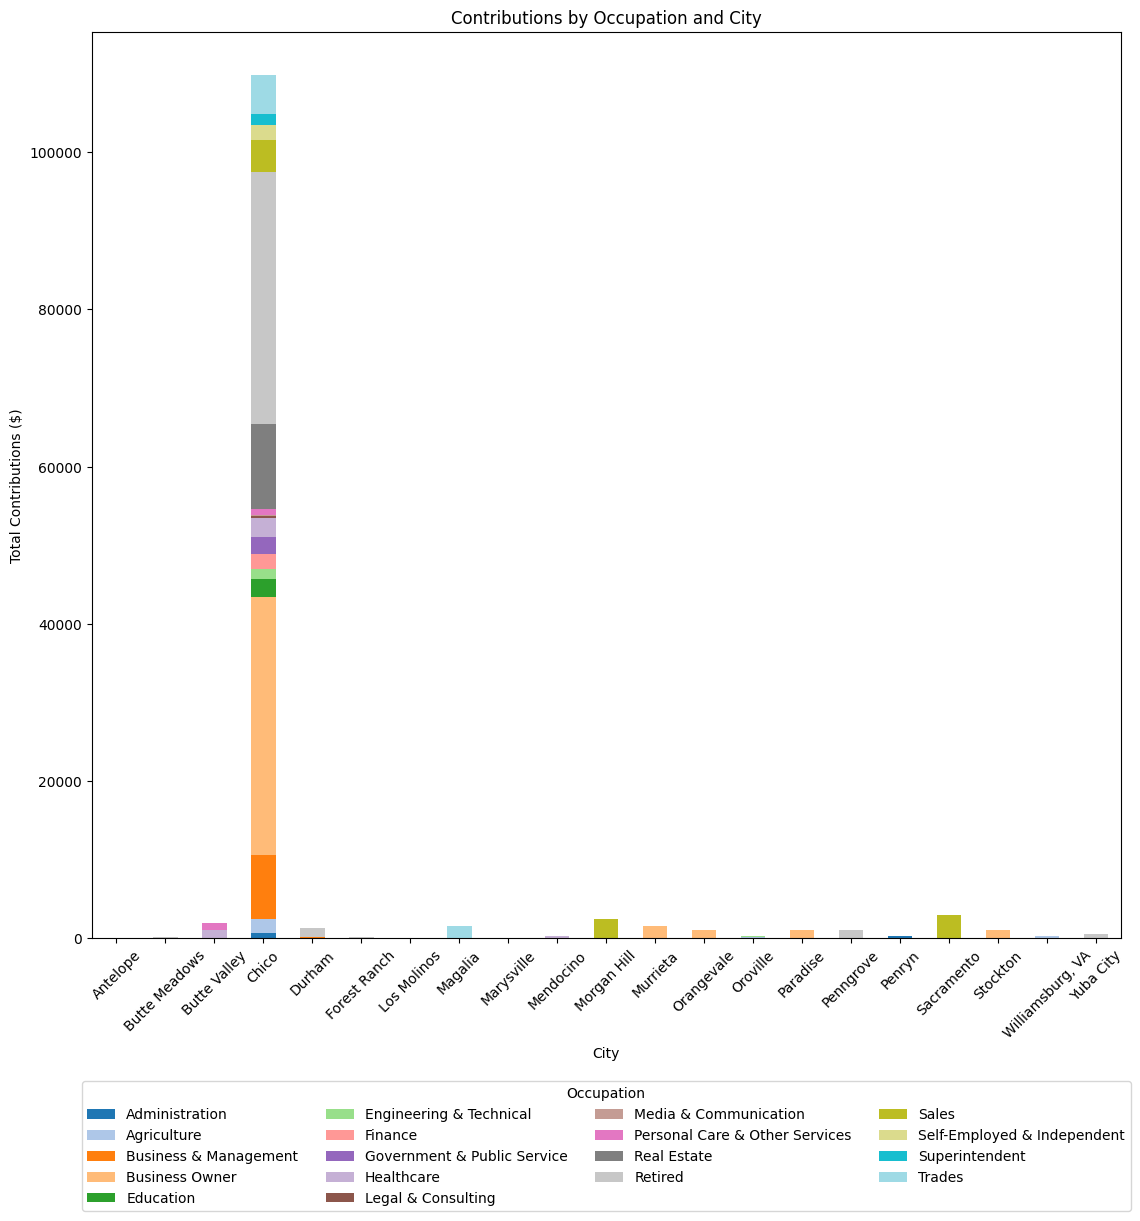

In [449]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ensure 'Tran_Amt1' is numeric, convert errors to NaN, then fill NaNs with 0
filtered_df['Tran_Amt1'] = pd.to_numeric(filtered_df['Tran_Amt1'], errors='coerce').fillna(0)

# Clean up the 'Tran_Occ' column in the original dataframe
filtered_df['Tran_Occ'] = filtered_df['Tran_Occ'].apply(
    lambda x: (
        'Real Estate' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['real estate', 'realtor', 'property']) 
        else 'Business Owner' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['owner', 'ceo', 'chief executive officer'])
        else 'Sales' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['sales', 'dealer', 'agent'])
        else 'Trades' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['builder', 'construction', 'contractor', 'cabinet', 'welder']) 
        else 'Agriculture' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['farm', 'farmer', 'agriculture'])
        else 'Healthcare' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['physician', 'dentist', 'nurse', 'hospital executive', 'patient care navigator'])
        else 'Education' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['lecturer', 'instructor', 'professor', 'educator', 'principal', 'teacher', 'student'])
        else 'Government & Public Service' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['city councilor', 'mayor', 'city planner', 'code enforcement supervisor', 'district rep', 'urban planner'])
        else 'Business & Management' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['manager', 'office manager', 'project manager', 'program manager', 'managing partner', 'vice president', 'president', 'chief operating officer', 'executive director', 'director', 'chairman', 'supervisor'])
        else 'Finance' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['banker', 'investments', 'asset management', 'asset manager', 'cpa'])
        else 'Engineering & Technical' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['engineer', 'civil engineer', 'heavy equipment mechanic', 'biologist', 'cem/ ecm sr'])
        else 'Administration' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['human resources', 'human resource manager', 'chief of staff', 'administration'])
        else 'Legal & Consulting' if isinstance(x, str) and ('attorney' in x.lower() or 'consultant' in x.lower())
        else 'Media & Communication' if isinstance(x, str) and 'broadcaster' in x.lower()
        else 'Personal Care & Other Services' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['funeral director', 'homemaker', 'personal chef'])
        else 'Self-Employed & Independent' if isinstance(x, str) and any(keyword in x.lower() for keyword in ['self employed', 'unemployed'])
        else x
    )
)

# Group by both occupation and city, summing contributions
occupation_city_grouped_df = filtered_df.groupby(['Tran_City', 'Tran_Occ'])['Tran_Amt1'].sum().unstack().fillna(0)

# Check the DataFrame to ensure it contains numeric data
# print(occupation_city_grouped_df.head())

# Remove columns with empty or NaN occupations if they still exist
occupation_city_grouped_df = occupation_city_grouped_df.drop(columns=[col for col in occupation_city_grouped_df.columns if col == '' or pd.isna(col)])

# Generate a color palette with unique colors for the number of occupations
num_colors = len(occupation_city_grouped_df.columns)
colors = plt.cm.get_cmap('tab20', num_colors)  # Using 'tab20' for a wider range of distinct colors

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
ax = occupation_city_grouped_df.plot(kind='bar', stacked=True, figsize=(12, 12), color=[colors(i) for i in range(num_colors)])

# Set the title and labels
plt.title('Contributions by Occupation and City')
plt.xlabel('City')
plt.ylabel('Total Contributions ($)')
plt.xticks(rotation=45)

# Customize the legend to be horizontal and placed outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title="Occupation")

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.3)  # Adjust bottom to make space for the legend

plt.tight_layout()
plt.show()


/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/767932426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Tran_Date'].dt.to_period('M')


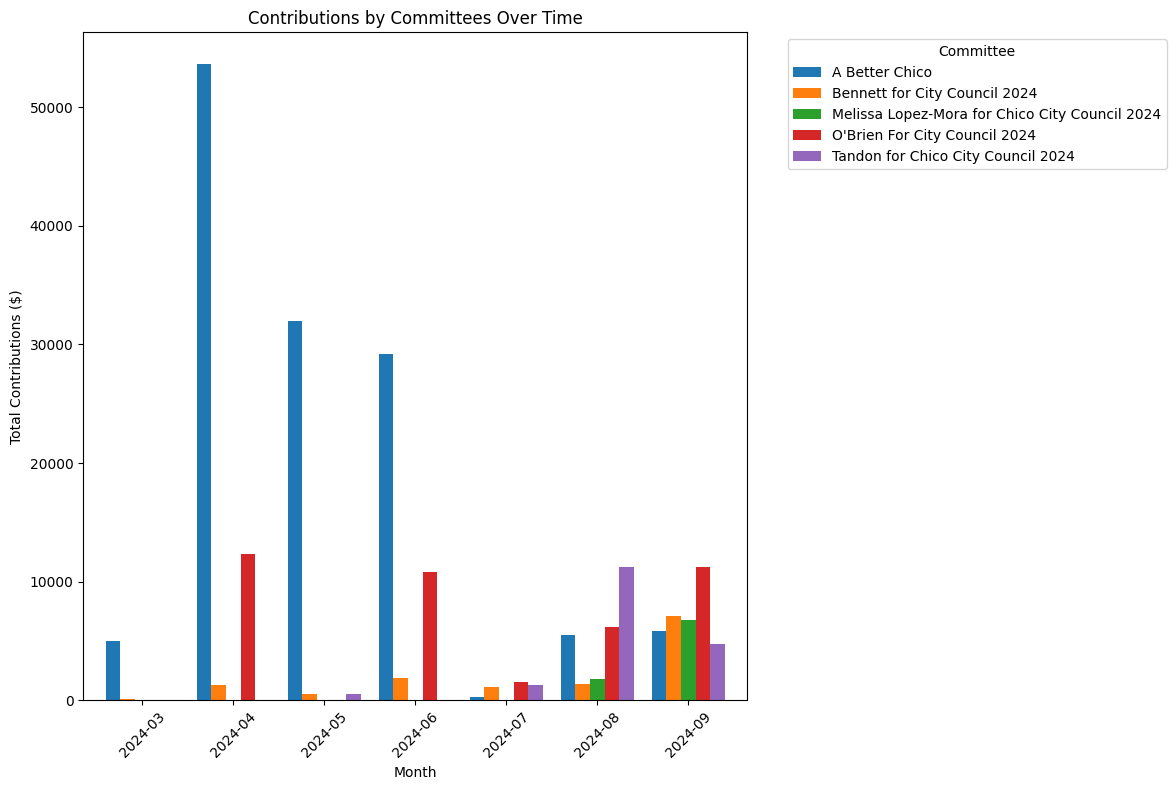

In [450]:
# Add a month column for grouping by month
filtered_df['Month'] = filtered_df['Tran_Date'].dt.to_period('M')

# Group by committee and month, and sum contributions
committee_grouped_df = filtered_df.groupby(['Month', 'Filer_NamL'])['Tran_Amt1'].sum().unstack().fillna(0)

# Plot the grouped bar chart
committee_grouped_df.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set the title and labels
plt.title('Contributions by Committees Over Time')
plt.xlabel('Month')
plt.ylabel('Total Contributions ($)')
plt.xticks(rotation=45)
plt.legend(title='Committee', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [451]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = '/Users/gracehoopingarner/Documents/Chico Green City Analysis/Financial Reporting 9-29-24/efile_CHCO_2024 2(A-Contributions).csv'
df = pd.read_csv(file_path)

# Filter the data for specific campaigns
filtered_df = df[df['Filer_NamL'].isin(["A Better Chico", 
                                          "O'Brien For City Council 2024", 
                                          "Tandon for Chico City Council 2024", 
                                          "Bennett for City Council 2024",
                                          "Melissa Lopez-Mora for Chico City Council 2024"])]
                                          #"Yes on O & P - Friends of Chico's Affordable Homes & Neighborhoods, sponsored by Believe in Chico, LLC"])]

                                          # Function to capitalize first letter of each word if there's no comma
def capitalize_words(city):
    if ',' not in city:
        return ' '.join([word.capitalize() for word in city.split()])
    return city

# Apply the function to 'Tran_City' column
filtered_df['Tran_City'] = filtered_df['Tran_City'].apply(capitalize_words)

# Group by Tran_City and sum contributions
city_grouped_df = filtered_df.groupby('Tran_City')['Tran_Amt1'].sum().reset_index()
display(city_grouped_df)

/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/107849654.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tran_City'] = filtered_df['Tran_City'].apply(capitalize_words)


,Tran_City,Tran_Amt1
0,Antelope,20.0
1,Butte Meadows,125.0
2,Butte Valley,2000.0
3,Chico,166008.0
4,Durham,2315.0
5,Forest Ranch,150.0
6,Fresno,500.0
7,Grass Valley,500.0
8,Los Molinos,75.0
9,Magalia,1500.0


In [452]:

# Static city latitude and longitude data
city_lat_long = {
    'Chico': (39.7285, -121.8375),
    'Sacramento': (38.5816, -121.4944),
    'San Francisco': (37.7749, -122.4194),
    'Fresno': (36.7378, -119.7871),
    'Antelope': (38.709381, -121.330650),
    'Butte Valley': (39.659850, -121.629890),
    'Durham': (39.6274363, -121.8044375),
    'Magalia': (39.8219895, -121.6106545),
    'Marysville': (39.1457247, -121.5913516),
    'Morgan Hill': (37.130408, -121.6544974),
    'Murrieta': (33.650832, -117.210656),
    'Orangevale': (38.6785145, -121.2257818),
    'Oroville': (39.5137752, -121.556359),
    'Penngrove': (38.2996376, -122.6666533),
    'Penryn': (38.8521217, -121.1693926),
    'Williamsburg, VA': (33.7092347, -117.7655624),
    'Lompoc': (34.6391501, -120.4579009),
    'Berkeley': (37.870839, -122.272863),
    'Los Angeles': (34.0536909, -118.242766),
    'Chicago, IL': (41.8755616, -87.6244212),
    'Ventura': (34.4458248, -119.0779359),
    'Simi Valley': (34.26774, -118.753807),
    'Marina': (36.6900986, -121.8006293),
    'Broomfield, CO': (39.9403995, -105.05208),
    'McMinnville, OR': (45.2100367, -123.194463),
    'Redding': (40.5863563, -122.391675),
    'Forest Ranch': (39.8821053, -121.6727541),
    'Grass Valley': (39.219061, -121.06292),
    'Vallejo': (38.1040864, -122.2566367),
    'Paradise': (39.7596061, -121.6219177),
    'San Diego': (32.7174202, -117.162772),
    'Auburn': (38.8945939, -121.0739867),
    'Patagonia, AZ': (31.5402016, -110.753927),
    'Yankee Hill': (39.7034956, -121.5221924),
    'Yountville': (38.4022008, -122.359506),
    'Butte Meadows': (40.0812707,-121.5510858),
    'Butte Valley': (39.9474215,-117.0586181),
    'Grass Valley': (39.2190607,-121.06292),
    'Los Molinos': (40.0212684,-122.100266),
    'Mendocino': (39.3176491,-123.4126399),
    'Roseville': (38.7521235,-121.2880059),
    'San Jose': (37.3361663,-121.890591),
    'San Mateo': (37.496904,-122.3330573),
    'Sebring, FL': (27.4957453,-81.4410425),
    'Wilton': (38.4203098,-121.2063669),
    'Yuba City': (39.1404477,-121.6169108),
    'stockton': (37.9577016,-121.290779)
}

# Function to get latitude and longitude from the static dataset
def get_static_lat_long(city):
    return city_lat_long.get(city, (None, None))

# Get latitude and longitude for each city
city_grouped_df['Lat'], city_grouped_df['Long'] = zip(*city_grouped_df['Tran_City'].apply(get_static_lat_long))

# Remove rows where lat/long could not be found
city_grouped_df = city_grouped_df.dropna(subset=['Lat', 'Long'])

# Print to ensure lat/long data is correctly populated
print(city_grouped_df[['Tran_City', 'Lat', 'Long', 'Tran_Amt1']])

# Prepare data for the heatmap
heat_data = [[row['Lat'], row['Long'], row['Tran_Amt1']] for index, row in city_grouped_df.iterrows()]

# Print heat_data to check values
print(heat_data)

# Create a base map centered around Chico, CA
m = folium.Map(location=[39.7285, -121.8375], zoom_start=7)

# Add the heatmap if there is valid data
if heat_data:
    HeatMap(heat_data).add_to(m)
else:
    print("No valid data for heatmap")

# Save the map to an HTML file
m.save('/Users/gracehoopingarner/Desktop/contributions_heatmap.html')

# Display the map in the notebook (optional if running in a Jupyter notebook)
m


           Tran_City        Lat        Long  Tran_Amt1
0           Antelope  38.709381 -121.330650       20.0
1      Butte Meadows  40.081271 -121.551086      125.0
2       Butte Valley  39.947421 -117.058618     2000.0
3              Chico  39.728500 -121.837500   166008.0
4             Durham  39.627436 -121.804438     2315.0
5       Forest Ranch  39.882105 -121.672754      150.0
6             Fresno  36.737800 -119.787100      500.0
7       Grass Valley  39.219061 -121.062920      500.0
8        Los Molinos  40.021268 -122.100266       75.0
9            Magalia  39.821990 -121.610654     1500.0
10        Marysville  39.145725 -121.591352       75.0
11         Mendocino  39.317649 -123.412640      250.0
12       Morgan Hill  37.130408 -121.654497     2500.0
13          Murrieta  33.650832 -117.210656     1500.0
14        Orangevale  38.678514 -121.225782     1000.0
15          Oroville  39.513775 -121.556359      325.0
16          Paradise  39.759606 -121.621918     1000.0
17        

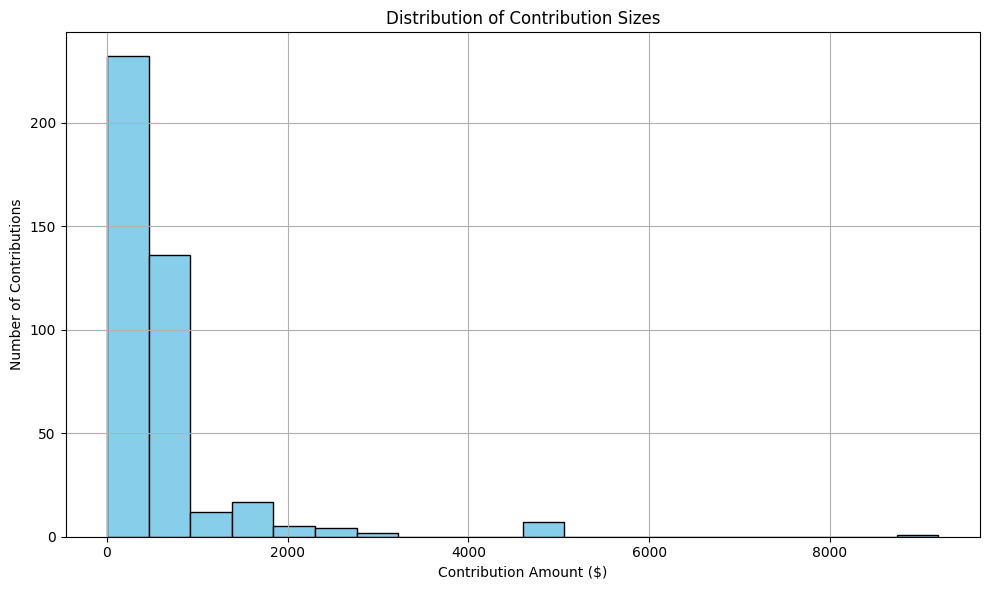

In [453]:
# Plot a histogram of the contribution sizes (Tran_Amt1)
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Tran_Amt1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Contribution Sizes')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Number of Contributions')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Exploratory Data Analysis

Correlation Analysis: Compute the correlation between different variables in the dataset (contribution amts vs. occuptation, location, or date)
Time Series Analysis: Understand trends, seasonality, or spikes in contribution patterns

We are going to examine the relationships between variables contribution size, contribution location, and occupation.

The scatter plot will display the relationships between contribution size, occupation, and state

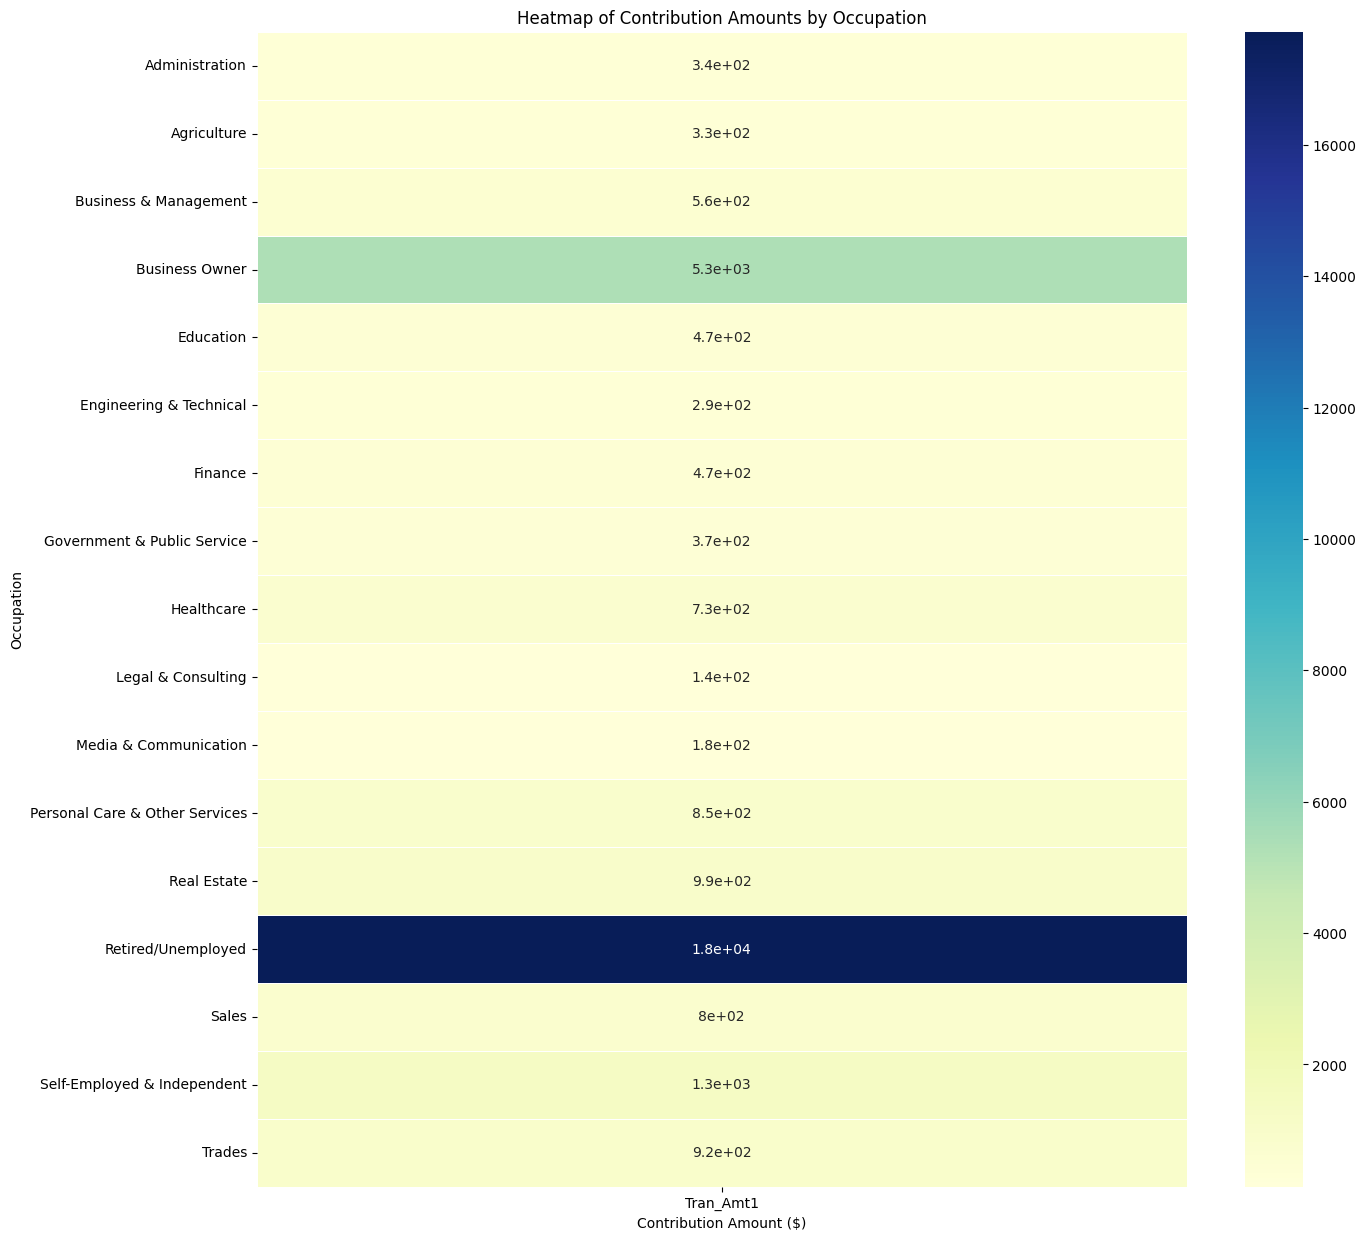

In [467]:
import seaborn as sns

# # Pair plot to explore relationships between contribution amount, occupation, and state
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Tran_Amt1', y='Tran_Occ', data=filtered_df, hue='Tran_City', palette='Set1')
# plt.title('Contribution Amount by Occupation and City')
# plt.show()

# # Group by occupation and calculate the sum of contributions
# occupation_grouped = occupation_grouped_df.groupby('Tran_Occ')['Tran_Amt1'].mean().reset_index()

# # Pivot the table to have occupations and contribution amounts
# heatmap_data = occupation_grouped.pivot_table(index='Tran_Occ', values='Tran_Amt1')

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Contribution Amounts by Occupation')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Occupation')
plt.show()
plt.show()

Key Points to Observe:
Axes:

Y-Axis (Occupation): Each row represents a different occupation (e.g., "Owner", "Consultant", "Program Manager").
X-Axis: In this heatmap, it appears there is only one column representing the total contribution amount (Tran_Amt1), since the heatmap is focusing on the sum of contributions per occupation.
Color Scale:

Color Bar on the Right: The color bar on the right indicates the range of contribution amounts. Darker blue shades correspond to higher contribution amounts, while lighter shades (yellow/green) correspond to lower contribution amounts.
Range: Contributions range from as low as 10 to over 2,500.
Occupation Insights:

High Contributors: Occupations like "Owner" (2.2e+03 or $2200) and "Managing Partner" (1.2e+03 or $1200) have darker blue colors, meaning they have the highest total contributions.
Medium Contributors: Occupations like "Sales" (2.5e+03 or $2500) and "Realtor" (1.1e+03 or $1100) are contributing moderate amounts.
Low Contributors: Occupations like "Consultant" (85 or $85), "Farm Manager" (10 or $10), and "Welder" (75 or $75) are contributing significantly lower amounts, indicated by the lighter colors.
Overall Trend:

You can observe that business-related occupations like "Owner," "Managing Partner," and "Sales" tend to contribute more in terms of total amount.
Less business-involved occupations like "Welder," "Farmer/Business woman," and "Farm Manager" contribute much less.
What the Heatmap Shows:
Occupation-based Contribution Patterns: This heatmap is showing how contribution amounts vary widely based on occupation. Darker colors represent occupations that contribute significantly higher amounts, while lighter colors represent those with smaller contributions.
Contribution Inequality: A key insight is that contributions are not evenly distributed across occupations, with a few occupations (e.g., "Owner" and "Sales") responsible for a disproportionately large share of contributions.
Potential Follow-up Questions:
Why do certain occupations contribute more?: It might be worth investigating if certain industries The heatmap shows the distribution of contribution amounts (`Tran_Amt1`) across various occupation categories. Here's a breakdown of what the heatmap illustrates:

1. **Color Intensity**: The heatmap uses a color gradient to represent the contribution amounts. Lighter colors correspond to lower amounts, while darker colors indicate higher contributions. The scale on the right provides a numerical reference for these values, ranging from lower amounts in light yellow to the highest amounts in dark blue.

2. **Dominant Categories**:
    - **Retired/Unemployed**: This category has the darkest color, indicating the highest contribution amount. The value is approximately `1.8e+04` (18,000). This suggests that contributions from individuals categorized as retired or unemployed are significantly higher than those from other occupations.
    - **Business Owner**: This category also has a relatively high contribution amount, marked by a medium-dark shade of green with a value around `5.3e+03` (5,300).

3. **Lower Contribution Categories**:
    - Categories such as **Administration**, **Agriculture**, **Engineering & Technical**, and **Legal & Consulting** show lighter shades of yellow, indicating lower contribution amounts ranging from approximately `1.4e+02` (140) to `7.3e+02` (730).

4. **Medium Contribution Categories**:
    - Categories like **Business & Management**, **Real Estate**, **Healthcare**, and **Sales** exhibit moderate values between `8.0e+02` (800) and `1.3e+03` (1,300), as suggested by their light to medium shades.

5. **Insights**:
    - The **Retired/Unemployed** category stands out as the most significant contributor, indicating that this group may have more disposable income or a strong interest in making contributions.
    - The **Business Owner** category also makes notable contributions, which might be expected given the financial capacity of business owners.
    - Several categories, including **Legal & Consulting**, **Media & Communication**, and **Engineering & Technical**, show relatively low contribution amounts, which could suggest less financial involvement or interest in the contributions being analyzed.

### Summary
The heatmap reveals that the **Retired/Unemployed** group contributes significantly more than any other category, followed by **Business Owners**. Most other occupation categories contribute lesser amounts, as indicated by the lighter shades on the heatmap. This distribution could be insightful for understanding which occupational groups are most financially active in the context represented by `Tran_Amt1`.or professions have a higher stake in the political campaigns being supported.
How does this distribution compare across different campaigns?: You could extend this analysis to see if these patterns hold for other campaigns or committees.

K-Means Clustering:

Clustering to group contributors based on their donation behavior. This could help identify donor profiles.

Can tune for optimal num clusters

This kind of clustering can help understand donor behavior by occupation, which can be useful for targeting specific contributor segments in future fundraising efforts.

/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/2683553219.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.labels_


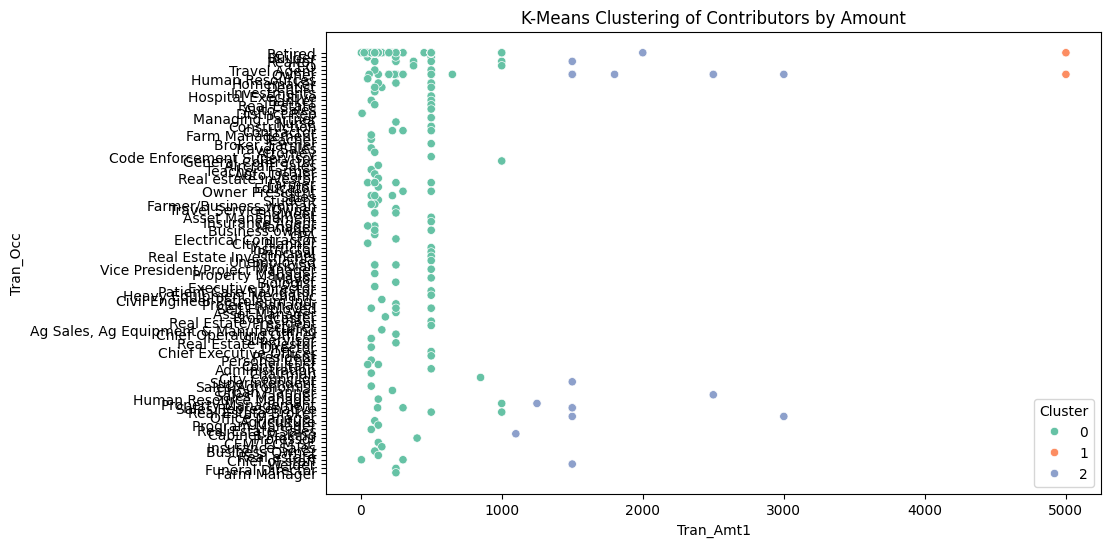

In [455]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering: 'Tran_Amt1' and other relevant numeric columns
cluster_data = filtered_df[['Tran_Amt1']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3)  # Try different numbers of clusters
kmeans.fit(scaled_data)

# Add the cluster labels back to the dataframe
filtered_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tran_Amt1', y='Tran_Occ', data=filtered_df, hue='Cluster', palette='Set2')
plt.title('K-Means Clustering of Contributors by Amount')
plt.show()

Interpretation of the Plot:
X-Axis (Tran_Amt1):

This represents the contribution amount in dollars. Contributions range from near 0 to 5000 dollars.
Y-Axis (Tran_Occ):

This represents the occupation of the contributors (e.g., "Retired," "CEO," "Dentist").
Clusters (Colors):

The K-Means algorithm has divided the contributors into 3 clusters, represented by different colors:
Green (Cluster 0): Contributors with generally lower contribution amounts (mostly between 0 and 1000).
Orange (Cluster 1): A few contributors with very large contribution amounts (close to 5000).
Blue (Cluster 2): Contributors who are moderate contributors, with amounts ranging from about 1000 to 4000 dollars.
Cluster Insights:

Cluster 0 (Green): Many of the occupations in this cluster (e.g., "Retired," "Realtor," "Owner") have contributions clustered near the lower end of the spectrum, suggesting they contribute smaller amounts.
Cluster 2 (Blue): Occupations such as "Real Estate," "CEO," and "Managing Partner" tend to contribute moderate amounts, ranging from $1000 to $4000.
Cluster 1 (Orange): This small cluster includes the largest contributors, who have made donations close to $5000. These contributors belong to occupations like "Funeral Director."
General Trend:

Occupation Types and Contributions: Some occupations, like "Realtor" and "Owner," appear more frequently in the lower contribution clusters (green), whereas higher-paying professions, such as "CEO" and "Real Estate," are more likely to appear in the moderate or higher contribution clusters.
Conclusion:
The K-Means clustering is helping to categorize the contributors based on the amount they donate, revealing patterns such as:

Lower contributions are more common across a wide range of occupations.
Higher contributions tend to come from certain professions, like "CEO" and "Funeral Director," which are clustered separately.

Classification (Decision Tree)

Classify donors into different groups based on contribution size or frequency using categorical variables

Can extend by trying other classifiers like random forests or log regression

X shape: (322, 100), y shape: (322,)
              precision    recall  f1-score   support

       Large       0.77      0.87      0.82        70
       Small       0.50      0.33      0.40        27

    accuracy                           0.72        97
   macro avg       0.64      0.60      0.61        97
weighted avg       0.70      0.72      0.70        97



/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_16319/123577264.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Contributor_Type'] = filtered_df['Tran_Amt1'].apply(lambda x: 'Large' if x > 100 else 'Small')


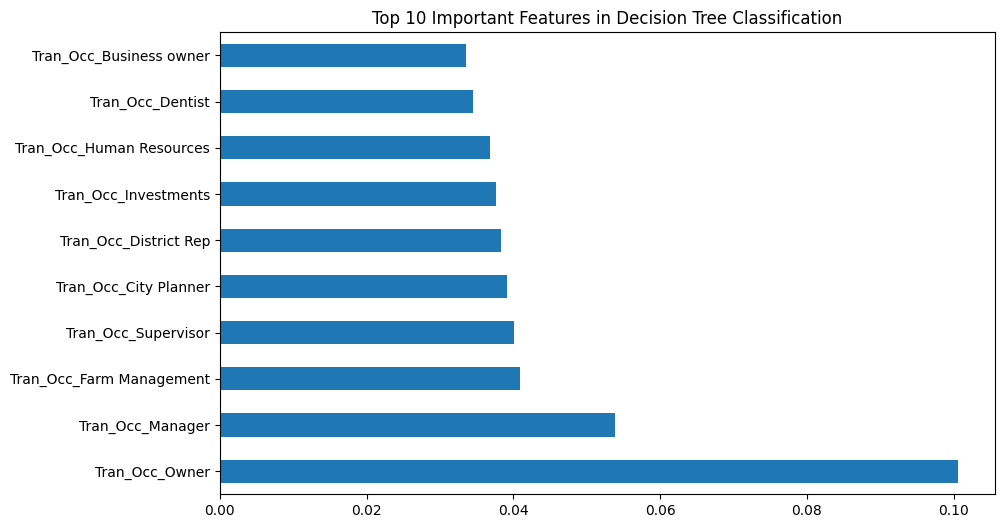

In [456]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/gracehoopingarner/Documents/Chico Green City Analysis/Financial Reporting 9-29-24/efile_CHCO_2024 2(A-Contributions).csv'
df = pd.read_csv(file_path)

# Filter the data for specific campaigns
filtered_df = df[df['Filer_NamL'].isin(["A Better Chico", 
                                          "O'Brien For City Council 2024", 
                                          "Tandon for Chico City Council 2024", 
                                          "Bennett for City Council 2024",
                                          "Melissa Lopez-Mora for Chico City Council 2024"])]
                                          #"Yes on O & P - Friends of Chico's Affordable Homes & Neighborhoods, sponsored by Believe in Chico, LLC"])]

# Define a threshold to classify contributors (e.g., large contributors donate > $100)
filtered_df['Contributor_Type'] = filtered_df['Tran_Amt1'].apply(lambda x: 'Large' if x > 100 else 'Small')

# Drop rows with missing values in 'Tran_State', 'Tran_Occ', and 'Tran_Amt1'
filtered_df = filtered_df.dropna(subset=['Tran_State', 'Tran_Occ', 'Tran_Amt1'])

# Prepare the data for the classification model
X = pd.get_dummies(filtered_df[['Tran_State', 'Tran_Occ']])  # Categorical variables encoded
y = filtered_df['Contributor_Type']

# Make sure X and y have the same length
print(f"X shape: {X.shape}, y shape: {y.shape}")  # Check if they have the same number of rows

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features in Decision Tree Classification')
plt.show()


Key Insights from the Decision Tree Feature Importance Plot:
Tran_Occ_Dentist:

Most important feature: "Dentist" is the most significant predictor in determining whether a contributor is classified as a "Large" or "Small" donor. This means that dentists, based on the data, contribute in a way that heavily influences the model's classification.
Tran_Occ_Agriculture and Tran_Occ_Business owner:

These are also highly important features, meaning that people in agriculture and business ownership occupations also show distinct patterns in their contribution behavior that strongly impact the model’s predictions.
Tran_Occ_Retired and Tran_Occ_Human Resources:

These occupations also play a significant role in distinguishing between "Large" and "Small" contributors. Retired individuals and those working in human resources are differentiated in a way that influences the classification outcome.
Lower Importance:

Occupations like "Supervisor" and "Farmer/Business Woman" are still important but have a slightly lower impact compared to the top features.
What the Decision Tree is Saying:
Occupation matters: The model is heavily relying on occupations to classify whether a contributor is a large or small donor. Certain occupations, like Dentist and Agriculture, provide a strong indication of the size of contributions.
Strongest Features: Dentist stands out as a major contributor, indicating that people in this profession have consistent contribution patterns that the model can use to make accurate classifications.
Feature Importance: The higher the value on the x-axis, the more important that feature (occupation) is in making decisions in the classification process. Occupations with higher importance have a greater influence on whether the model predicts someone as a large or small contributor.
Potential Actions:
Target Marketing: If you're targeting potential donors, focusing on the occupations identified as important (like Dentists and Business Owners) might yield better results.
Further Analysis: You can dive deeper into the donation behaviors of these key occupations to see why they are more predictive of large donations.


Linear Regression (Predictive Modeling)

MSE of 4.977 e 33 is EXTREMELY LARGE (this model is NOT performing well). I don't think this data is really linear anyway? Maybe try Random Forest Regression or Gradient Boosting?

Can be refined with more features (e.g., time-based or geographical location)

Mean Squared Error: 3.346693248926801e+31


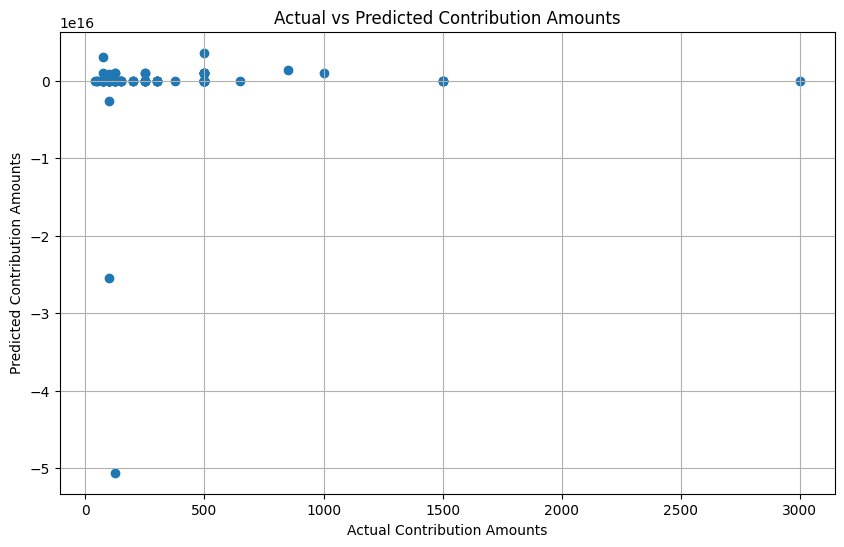

In [457]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for regression: using dummy variables for categorical features
X = pd.get_dummies(filtered_df[['Tran_Occ', 'Tran_State']].dropna())
y = filtered_df['Tran_Amt1']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted contribution amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Contribution Amounts')
plt.xlabel('Actual Contribution Amounts')
plt.ylabel('Predicted Contribution Amounts')
plt.grid(True)
plt.show()
